# 前向传播、反向传播和计算图
> 研究对象: 带有权重衰退 $L_2$正则化的单隐藏多层感知机

## 前向传播
> 前向传播: 按照顺序(从输入层到输出层)计算和存储神经网络中每一层的结果

对于单隐藏神经网络, 这里介绍输入样本由 $d$ 个特征, 也就是 $\mathbf{x} \in \mathbb{R}^d$, 并且隐藏层不包括偏置项, 这里的中间变量为:
$$
\mathbf{z} = \mathbf{W}^{(1)} \mathbf{x}
$$
其中 $\mathbf{W}^{(1)}$是隐藏层权重参数, 中间变量 $\mathbf{z} \in \mathbb{R}^h$ 通过激活函数 $\varphi$, 之后可以得到长度为 $h$ 的隐藏激活向量:
$$
\mathbf{h} = \varphi(\mathbf{z})
$$
假设输出层权重为 $\mathbf{W}^{(2)} \in \mathbb{R}^{q \times h}$, 那么可以得到输出层变量, 长度为 $q$:
$$
\mathbf{o} = \mathbf{W}^{(2)} \mathbf{h}
$$
假设损失函数为 $l$, 样本标签为 $y$, 那么单个样本的损失项为:
$$
L = l(\mathbf{o}, y)
$$
同时根据 $L_2$ 正则化的定义, 给定超参数 $\lambda$, 正则化项为:
$$
s = \frac{\lambda}{2} (\|\mathbf{W}^{(1)}\|^2_F + \|\mathbf{W}^{(2)}\|^2_F)
$$
最后模型在给定样本上的正则化损失为:
$$
J = L + s
$$
这里的 $J$ 可以叫做目标函数, 并且需要注意, 在 `PyTorch` 中, 一般是在优化器中指定权重衰退等选项

## 前项传播计算图像
前项传播计算图像包含中间变量, 损失函数, 正则化项以及正则化损失等之间的关系, 有一点类似于信号流图, 比如描述上述过程的前向传播计算图如下:
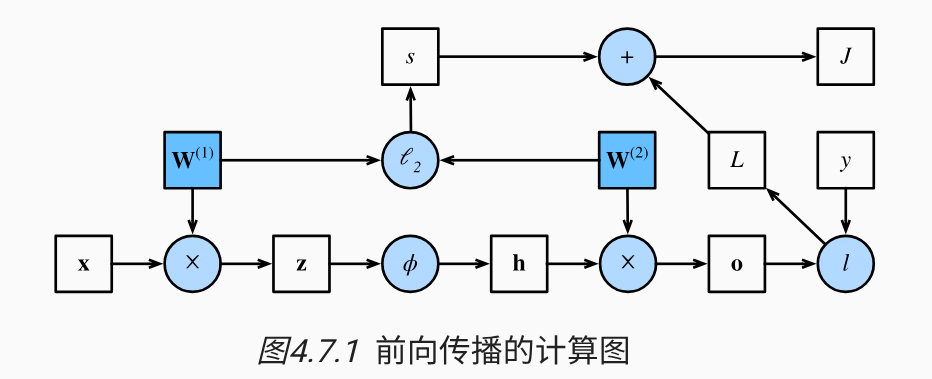

## 反向传播
反向传播是计算神经网络参数梯度的方法, 该方法更具链式法则, 按照相反的顺序从输出层到输入层遍历网络, 并且存储了计算某些参数梯度所需要任何中间变量, 不妨假设有函数 $\mathbf{Y} = f(\mathbf{X})$ 和 $\mathbf{Z} = g(\mathbf{Y})$, 其中输入和输出 $X, Y, Z$是任何形状大的张量, 根据链式法则, 可以计算 $Z$ 关于 $X$ 的导数为:
$$
\frac{\partial Z}{\partial X} = prod(\frac{\partial Z}{\partial Y}, \frac{\partial Y}{\partial X} )
$$
其中 $prod$ 操作表示首先执行必要的操作(比如换位或者交换输入位置)之后进行参数相乘

注意对于我们的研究对象, 网络的参数就是 $\mathbf{W}^{(1)}$ 和 $\mathbf{W}^{(2)}$, 反向传播其实就是需要计算梯度: $\frac {\partial J}{\partial \mathbf{W}^{(1)}}$ 以及 $\frac {\partial J}{\partial \mathbf{W}^{(2)}}$, 下面展示应该如何求解这两项

首先往前推导, 首先计算 $J = L + s$ 相对于 $L$ 和 $s$ 的梯度:
$$
\frac{\partial J}{\partial L} = 1 \ and \ \frac{\partial J}{\partial s} = 1
$$
之后需要计算目标函数关于 输出 $\mathbf{o}$ 的梯度:
$$
\frac{\partial J}{\partial \mathbf{o}} = \text{prod} \left( \frac{\partial J}{\partial L}, \frac{\partial L}{\partial \mathbf{o}} \right) = \frac{\partial L}{\partial \mathbf{o}} \in \mathbb{R}^q.
$$
接下来需要计算正则化项目对于两个参数的梯度:
$$
\frac{\partial s}{\partial \mathbf{W}^{(1)}} = \lambda \mathbf{W}^{(1)} \text{ and } \frac{\partial s}{\partial \mathbf{W}^{(2)}} = \lambda \mathbf{W}^{(2)}.
$$
所以可以根据链式法则得到输出层参数的梯度:
$$
\frac{\partial J}{\partial \mathbf{W}^{(2)}} = \text{prod} \left( \frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{W}^{(2)}} \right) + \text{prod} \left( \frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(2)}} \right) = \frac{\partial J}{\partial \mathbf{o}} \mathbf{h}^\top + \lambda \mathbf{W}^{(2)}.
$$
此时继续反向传播, 关于隐藏层输出的梯度为:
$$
\frac{\partial J}{\partial \mathbf{h}} = \text{prod} \left( \frac{\partial J}{\partial \mathbf{o}}, \frac{\partial \mathbf{o}}{\partial \mathbf{h}} \right) = \mathbf{W}^{(2)^\top} \frac{\partial J}{\partial \mathbf{o}}.
$$
从而可以推导出中间变量 $\mathbf{z}$ 的梯度:
$$
\frac{\partial J}{\partial \mathbf{z}} = \text{prod} \left( \frac{\partial J}{\partial \mathbf{h}}, \frac{\partial \mathbf{h}}{\partial \mathbf{z}} \right) = \frac{\partial J}{\partial \mathbf{h}} \odot \phi'(\mathbf{z}).
$$
其中 $\odot$ 表示按元素乘法运算符号, 表示按照元素进行计算
最终可以得到最接近输入层模型参数的梯度 $\frac{\partial J}{\partial \mathbf{W}^{(1)}} \in \mathbb{R}^{h \times d}$, 最终根据链式法则可以得到:
$$
\frac{\partial J}{\partial \mathbf{W}^{(1)}} = \text{prod} \left( \frac{\partial J}{\partial \mathbf{z}}, \frac{\partial \mathbf{z}}{\partial \mathbf{W}^{(1)}} \right) + \text{prod} \left( \frac{\partial J}{\partial s}, \frac{\partial s}{\partial \mathbf{W}^{(1)}} \right) = \frac{\partial J}{\partial \mathbf{z}} \mathbf{x}^\top + \lambda \mathbf{W}^{(1)}.
$$

## 训练神经网络
在训练神经网络的过程中, 前向传播和反向传播相互依赖; 对于前项传播, 沿着依赖的方向遍历计算图并且计算其路径上的所有变量, 然后将这些用于反向传播, 其中计算顺序和计算图相反

训练神经网络的时候, 在初始化模型参数之后, 需要交替使用前向传播和反向传播, 并且利用反向传播给出的梯度来更新模型参数, 由于反向传播的过程中需要重复利用前项传播中存储的中间值, 从而避免重复计算, 带来的影响就是需要保留中间值, 直到反向传播完成, 这也是训练比单纯预测需要更多显存的原因之一 ; 同时这些中间值大的大小(比如矩阵大小等) 与网络层的数量和批量大小大致成正比, 所以使用更大的批量来训练更深层次的网络容易导致 `out of memory` 错误